In [2]:
import os
import matplotlib.pyplot as pylt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import warnings
warnings.filterwarnings('ignore')

In [61]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [9]:
# Reading and Understanding the Data
data = pd.read_csv("C:/Users/sohbanerjee/Desktop/bikesharing dataset.csv", low_memory=False)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
data_import_shape=data.shape
data_import_shape

(730, 16)

In [11]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,6/1/2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,7/1/2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,8/1/2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,9/1/2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10/1/2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
# No null values found in the bike sharing dataset

In [14]:
# Check for missing values in any of the columns
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      instant  dteday  season     yr   mnth  holiday  weekday  workingday  \
0      False   False   False  False  False    False    False       False   
1      False   False   False  False  False    False    False       False   
2      False   False   False  False  False    False    False       False   
3      False   False   False  False  False    False    False       False   
4      False   False   False  False  False    False    False       False   
..       ...     ...     ...    ...    ...      ...      ...         ...   
725    False   False   False  False  False    False    False       False   
726    False   False   False  False  False    False    False       False   
727    False   False   False  False  False    False    False       False   
728    False   False   False  False  False    False    False       False   
729    False   False   False  False  False    False    False       False   

     weathersit   temp  a

In [ ]:
# No missing values found in any of the columns

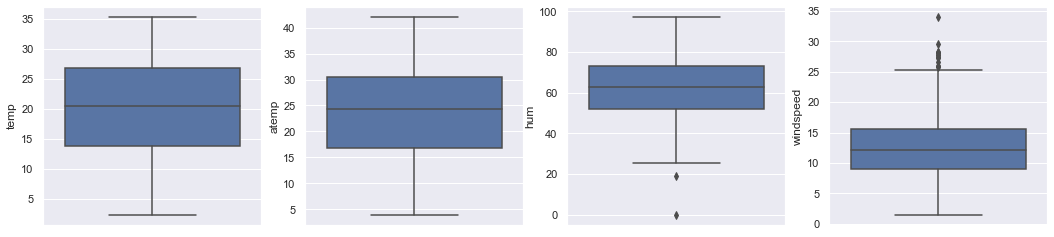

In [15]:
# Check for any outliers - Draw boxplots for independent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
pylt.figure(figsize=(18,4))

i = 1
for col in cols:
    pylt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i=i+1

In [ ]:
# From these boxplots, it can be seen that there are no outliers in the bikesharing dataset

In [18]:
# Convert the variables "season" and "weathersit" to categorical variables
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

data.mnth = data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

data.weekday = data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Figure size 1080x2160 with 0 Axes>

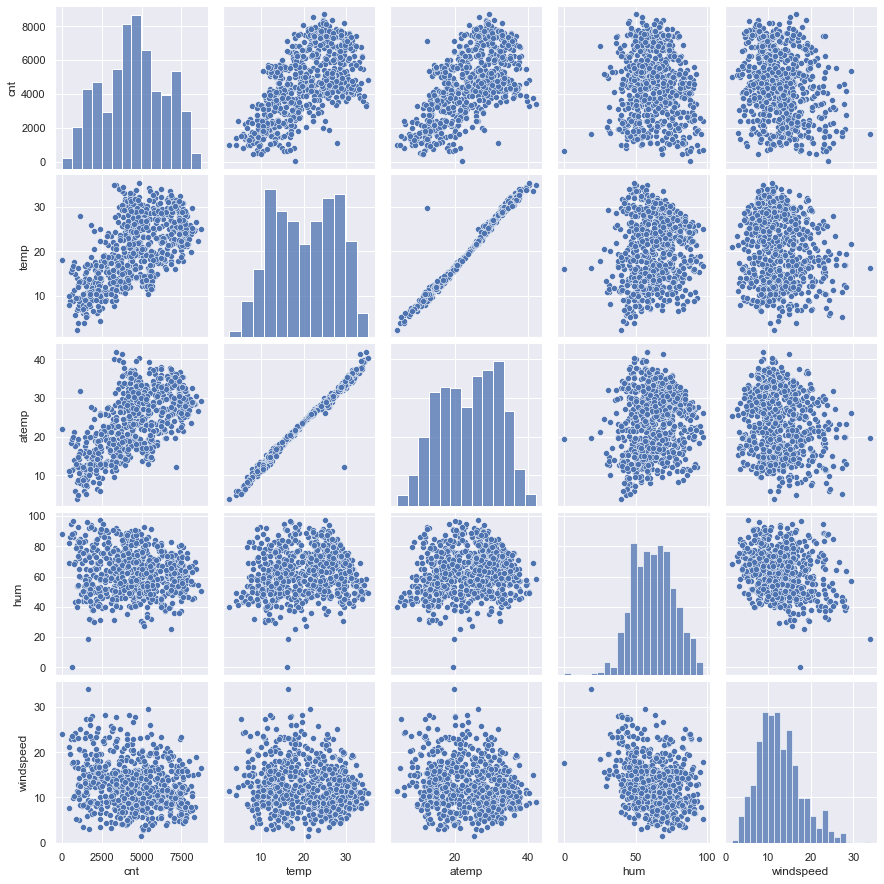

In [19]:
#Draw pairplots for continuous numeric variables to check linear relationship
pylt.figure(figsize = (15,30))
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
pylt.show()

In [ ]:
# From the pairplots, it can be inferred that both "temp" and "atemp" have the highest correlation with the target variable "cnt"
# Also, the variables "temp" and "atemp" are highly correlated with each other
# The output variable "cnt" has a linear relationship with "temp" and "atemp"

<Figure size 1440x1080 with 0 Axes>

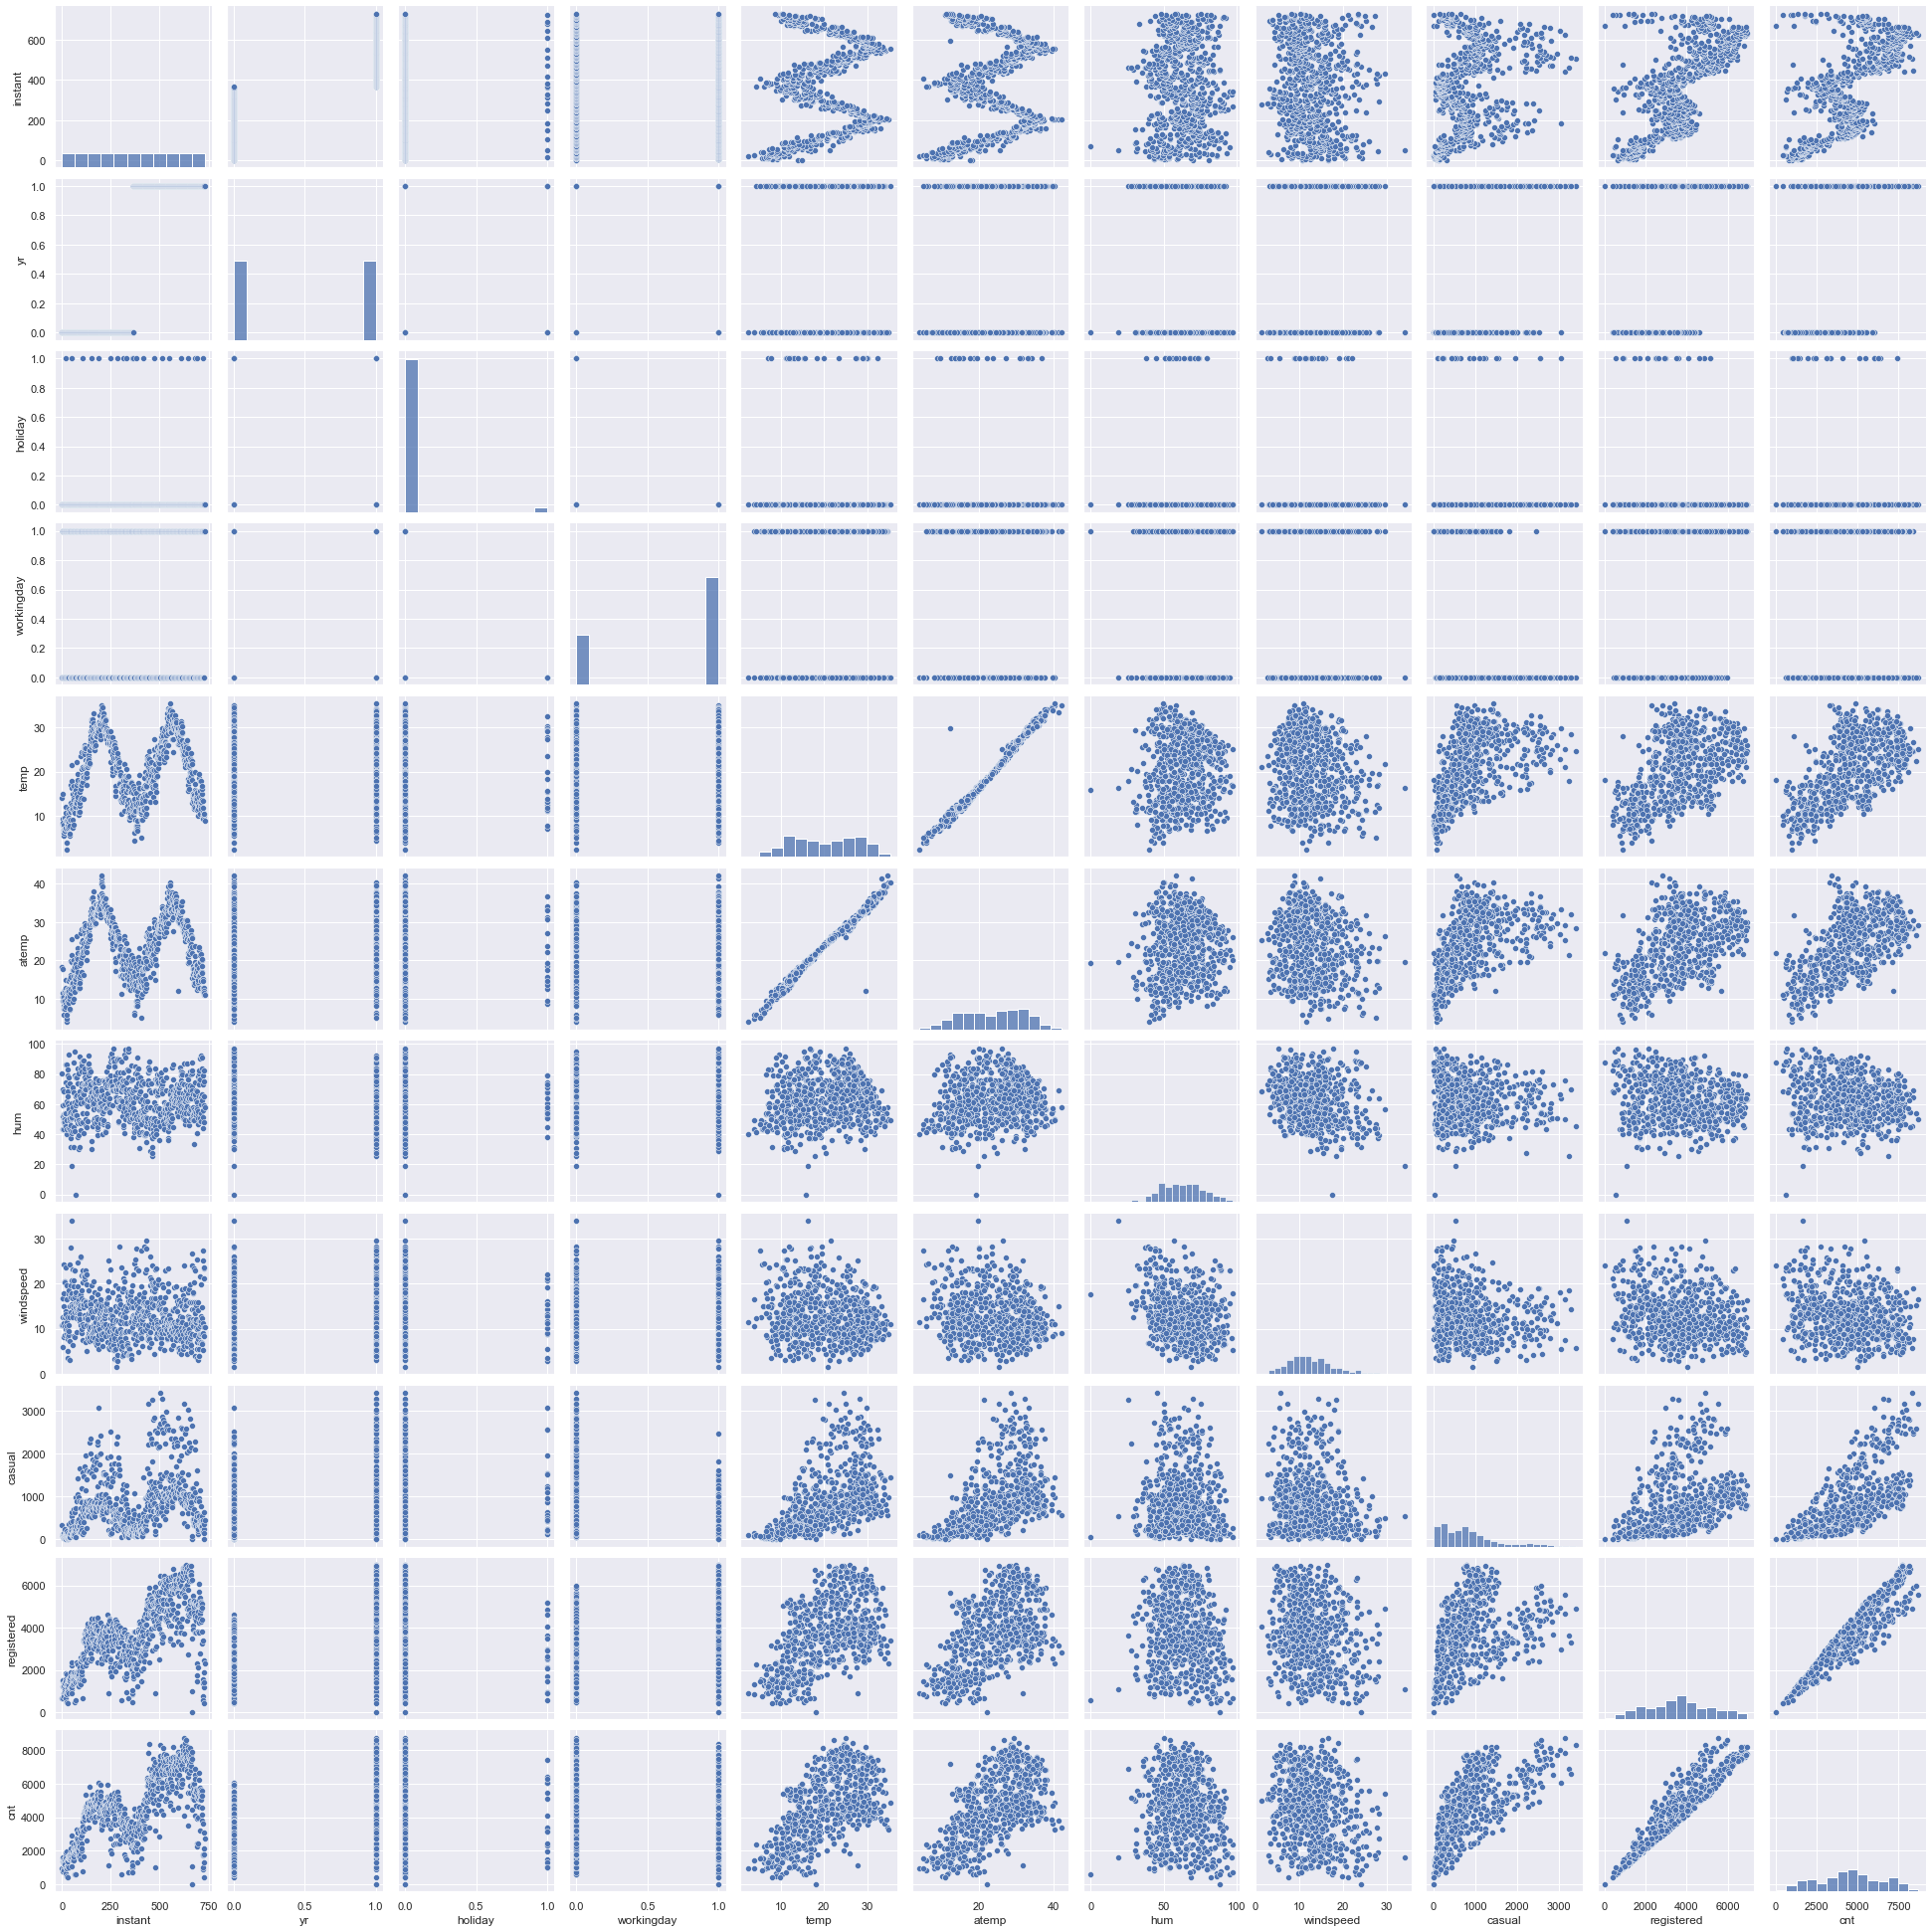

In [20]:
# Find correlation between numeric variables
pylt.figure(figsize=(20,15))
sns.pairplot(data)
pylt.show()

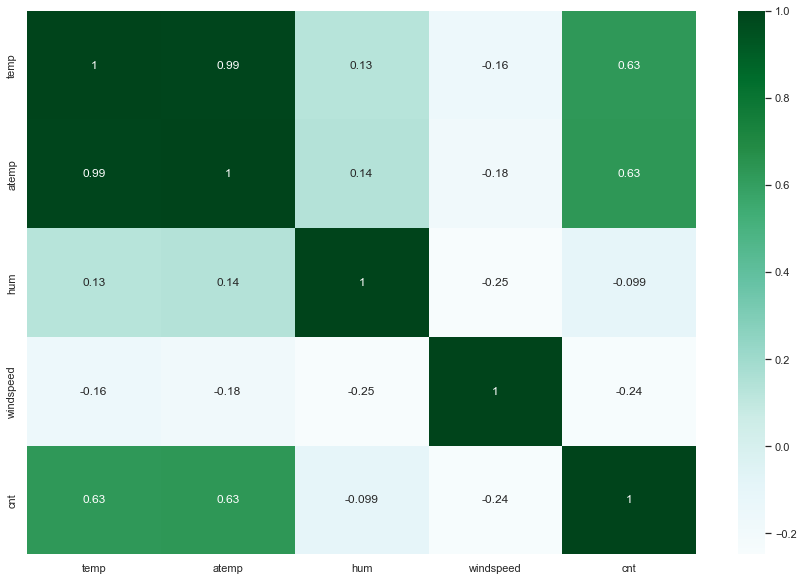

In [21]:
sns.heatmap(data[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
pylt.show()

In [ ]:
# The variables "temp" and "atemp" have correlation 0.99, that is, these are highly correlated
# Also, it seems "atemp" is derived from "temp" and hence "atemp" can be dropped

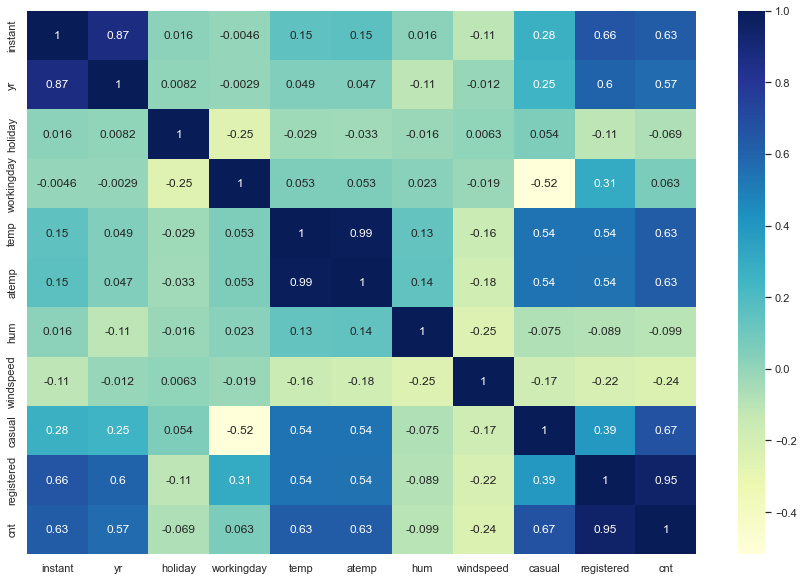

In [22]:
cor=data.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
pylt.show()

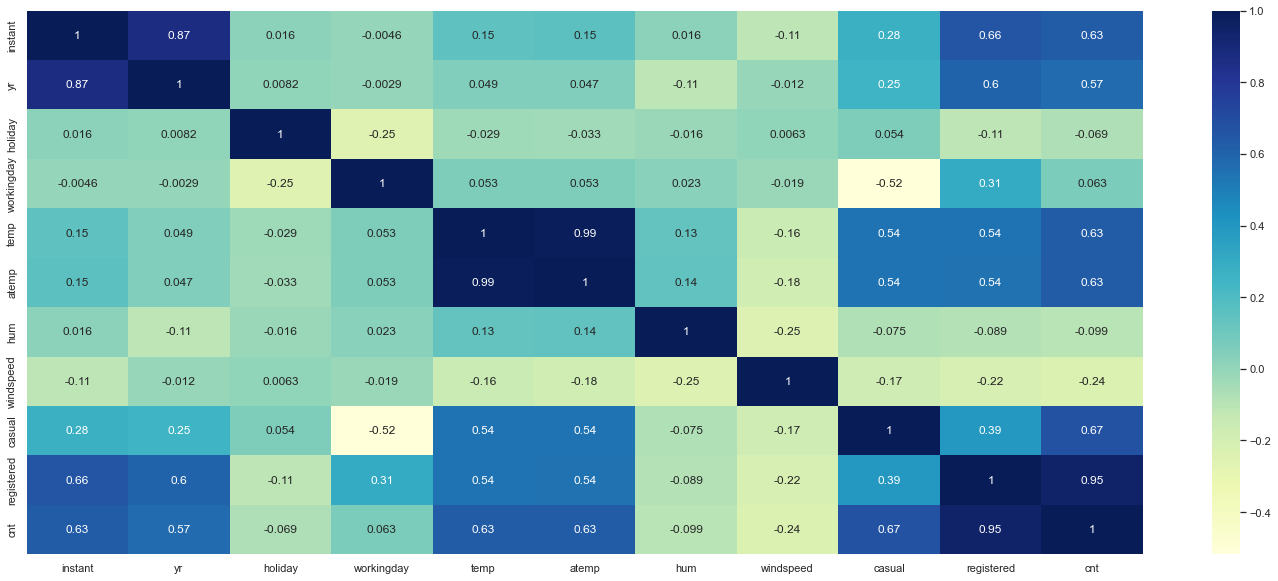

In [23]:
# Correlation between variables
corr = data.corr()
pylt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
pylt.show()

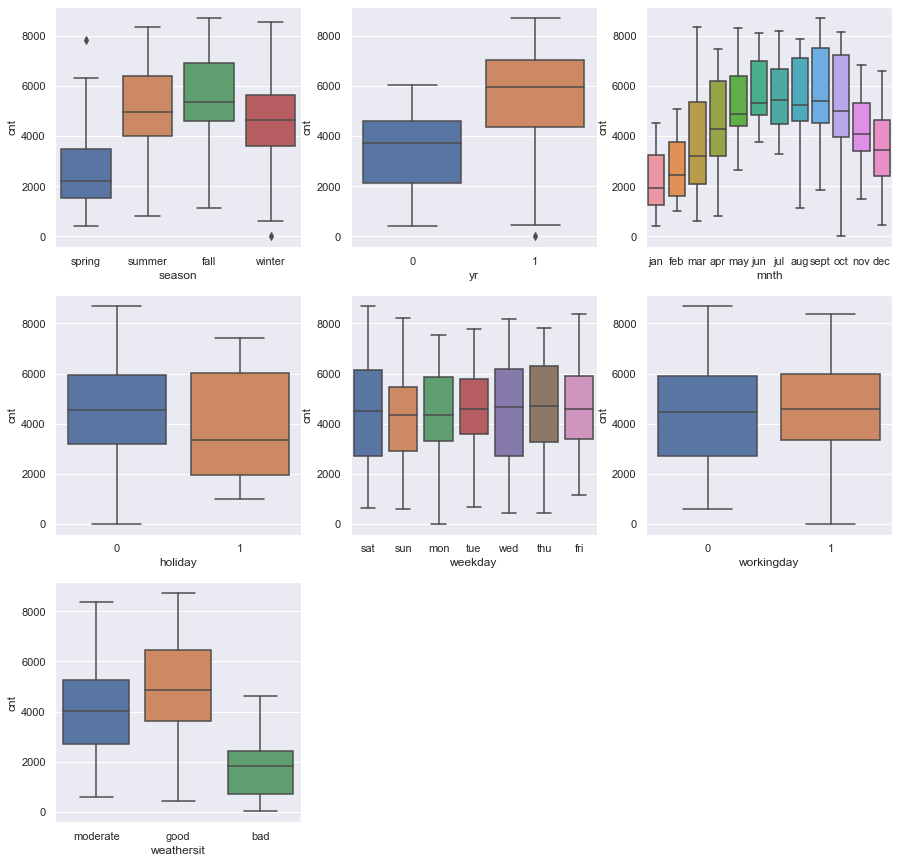

In [24]:
# Analyze categorical variables with respect to target variable
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
pylt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    pylt.subplot(3,3,i[0]+1)
    sns.boxplot(data=data, x=i[1], y='cnt')
pylt.show()

In [25]:
# The following inferences can be drawn from the above boxplots
# Season: 3:fall has highest demand for rental bikes
# The demand for bike has grown in the year 2019
# Demand is continuously growing each month till June. September month has highest demand. After September, demand shows a decreasing trend
# When there is a holiday, demand has decreased.
# Weekday is not a predictor of demand
# The clear weathershit has highest demand
# During September, bike sharing is more. During the year end and beginning, it is less.

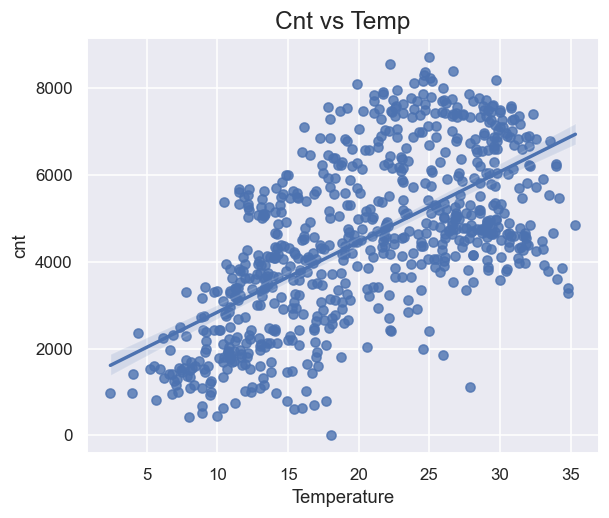

In [26]:
pylt.figure(figsize=(6,5),dpi=110)
pylt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=data,y="cnt",x="temp")
pylt.xlabel("Temperature")
pylt.show()

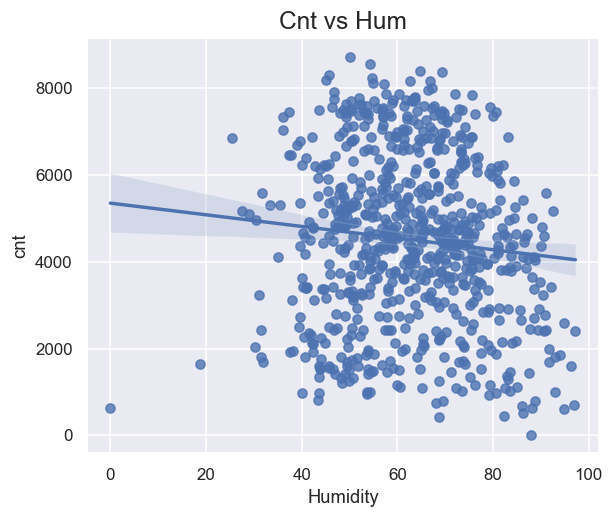

In [27]:
pylt.figure(figsize=(6,5),dpi=110)
pylt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=data,y="cnt",x="hum")
pylt.xlabel("Humidity")
pylt.show()

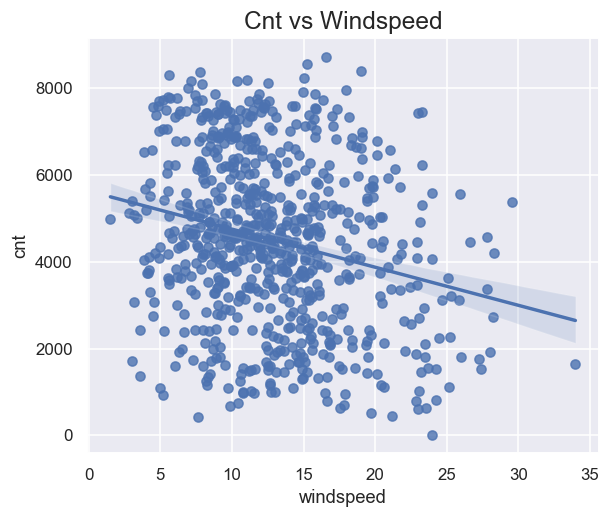

In [28]:
pylt.figure(figsize=(6,5),dpi=110)
pylt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=data,y="cnt",x="windspeed")
pylt.show()

In [ ]:
# The following inferences can be drawn from the above plots
# Demand for bikes is positively correlated to temp.We can see that cnt is linearly increasing with temp indicating linear relation.
# Hum values are more scattered around.
# Windspeed values are more scattered around.But we can see cnt decreasing with increase in windspeed.

In [29]:
data.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [30]:
# Data Preparation for Linear Regression
data = pd.get_dummies(data=data,columns=["season","mnth","weekday"],drop_first=True)
data = pd.get_dummies(data=data,columns=["weathersit"])

In [ ]:
# Dropping the first column as (n-1) dummies can explain n categories
# For "weathersit" first column was not dropped so as not to lose the details about severe weather conditions

In [31]:
data.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [32]:
data.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,1,1/1/2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,1
1,2,2/1/2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,1,0,0,0,0,0,1
2,3,3/1/2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,1,0,0,0,0,0,0,1,0
3,4,4/1/2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,1,0
4,5,5/1/2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,1,0,1,0


In [34]:
# Split data into training and test
data.shape

(730, 35)

In [35]:
y=data.pop('cnt')
X=data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,1,1/1/2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,1
1,2,2/1/2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,1,0,0,0,0,0,1
2,3,3/1/2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,1,0,0,0,0,0,0,1,0
3,4,4/1/2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,1,0
4,5,5/1/2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,1,0,1,0


In [36]:
print(X_train.shape)
print(X_test.shape)

(511, 34)
(219, 34)


In [39]:
# Feature Scaling of continuous variables
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
num = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,374.545988,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,858.600783,3694.350294,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,213.063061,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,672.706953,1573.398840,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,416.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.500000,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,336.500000,2628.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,381.000000,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,738.000000,3729.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,562.500000,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,1094.500000,4804.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,730.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3252.000000,6946.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
X_train.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,684,15-11-2019,1,0,1,0.327133,0.322150,0.639330,0.327101,320,...,0,0,0,0,1,0,0,0,0,1
645,646,8/10/2019,1,1,0,0.403972,0.404998,0.731215,0.419004,874,...,0,1,0,0,0,0,0,0,0,1
163,164,13-06-2018,0,0,1,0.717562,0.685963,0.509660,0.708724,863,...,0,1,0,0,0,0,0,0,1,0
360,361,27-12-2018,0,0,1,0.331287,0.326273,0.785745,0.415925,103,...,0,0,0,0,0,1,0,0,0,1
640,641,3/10/2019,1,0,1,0.745598,0.682653,0.817947,0.110593,728,...,0,0,0,0,0,0,1,0,0,1


In [43]:
# Dropping "dteday" as "month" and "weekday" columns are available
# Dopping "casual" and "registered" columns as "cnt" column is the sum of "casual" and "registered" columns
X_train.drop(['dteday'], axis = 1, inplace = True)

KeyError: "['dteday'] not found in axis"

In [44]:
X_train.drop(['casual'], axis = 1, inplace = True)
X_train.drop(['registered'], axis = 1, inplace = True)

In [45]:
X_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,374.545988,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,213.063061,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.500000,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,381.000000,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,562.500000,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,730.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
X_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,684,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,...,0,0,0,0,1,0,0,0,0,1
645,646,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,...,0,1,0,0,0,0,0,0,0,1
163,164,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,...,0,1,0,0,0,0,0,0,1,0
360,361,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,...,0,0,0,0,0,1,0,0,0,1
640,641,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,...,0,0,0,0,0,0,1,0,0,1


In [48]:
# Use RFE to eliminate some columns
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
rfe = RFE(lr)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [53]:
RFE(estimator=LinearRegression(), n_features_to_select=15)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 17),
 ('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 15),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 16),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

In [55]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [56]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [57]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [58]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']]

In [59]:
X_train_rfe.shape

(511, 15)

In [62]:
# Model-1: Start with all variables selected by RFE
cols=['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.72e-185
Time:                        09:49:43   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2693.1493    342.442     

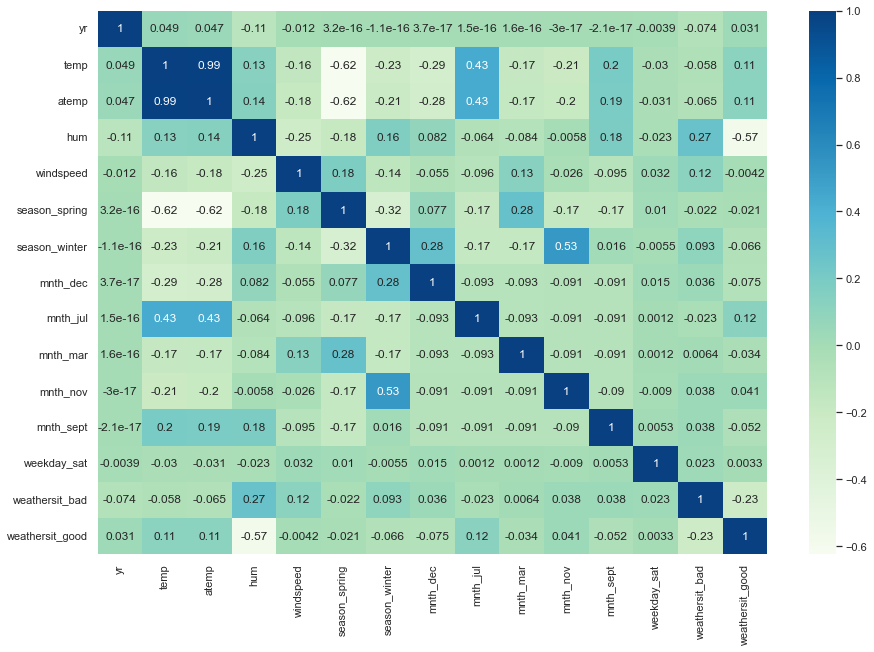

In [67]:
pylt.figure(figsize = (15,10))
sns.heatmap(data[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
pylt.show()     

In [69]:
# Model-2: Dropping column "temp" as it is insignificant
cols=['yr', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.16e-186
Time:                        10:15:28   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2692.3562    341.992     

In [70]:
# Model-3: Dropping the column "hum" as it has negative coefficient
cols=['yr', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.63e-183
Time:                        10:17:40   Log-Likelihood:                -4135.5
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     497   BIC:                             8358.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1664.6913    242.730     

In [71]:
# Model:4: Dropping the column "weekday_sat" as it has higher p-value than other columns
cols=['yr', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.29e-184
Time:                        10:20:35   Log-Likelihood:                -4136.6
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     498   BIC:                             8354.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1700.0710    241.835     

In [91]:
# Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.832 Let us select Model 4 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables
# Build final model using sklearn
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1
cols=['yr', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1700.070951945821 [ 2004.36518036  3652.43542848  -679.91443776 -1347.99797975
   687.61861608  -569.75423207  -437.66434925   451.25839762
  -689.0581908    411.58879511 -1507.97786316   692.83361456]


In [77]:
# Model Evaluation
y_train_pred = lr.predict(X_train[cols])

In [78]:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    pylt.title('Error Terms')
    pylt.xlabel('Errors')

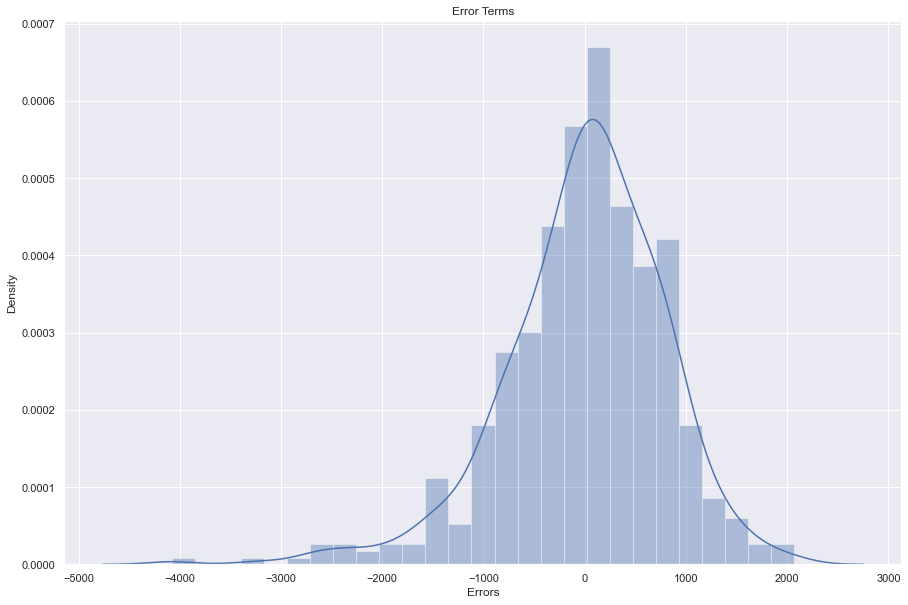

In [79]:
plot_res_dist(y_train, y_train_pred)

In [ ]:
# Errors are normally distibuted here with mean zero

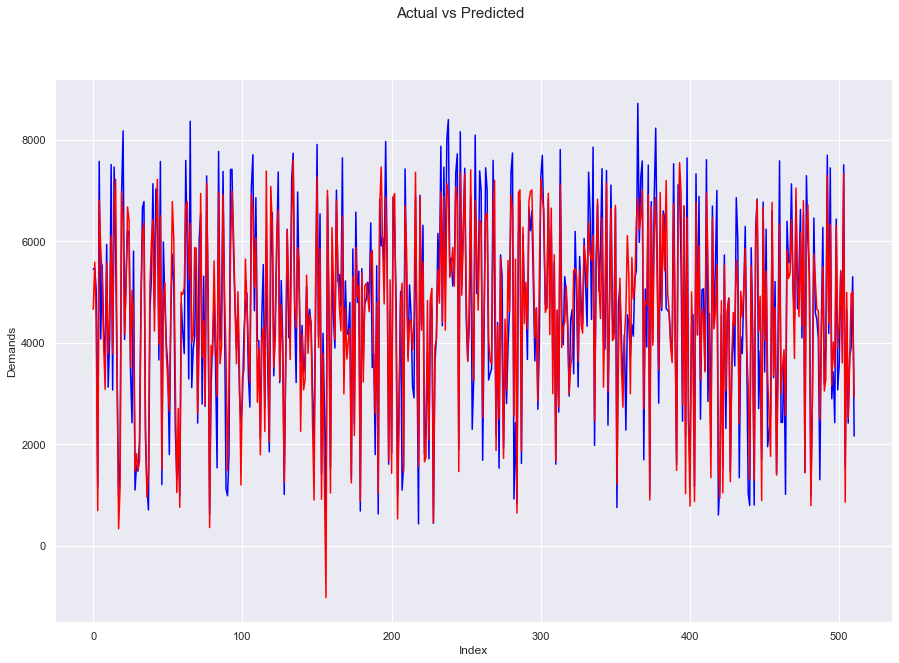

In [92]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
pylt.plot(c,y_train, color="blue")
pylt.plot(c,y_train_pred, color="red")
pylt.suptitle('Actual vs Predicted', fontsize = 15)
pylt.xlabel('Index')
pylt.ylabel('Demands')
pylt.show()

In [93]:
# Actual and Predicted result following almost the same pattern

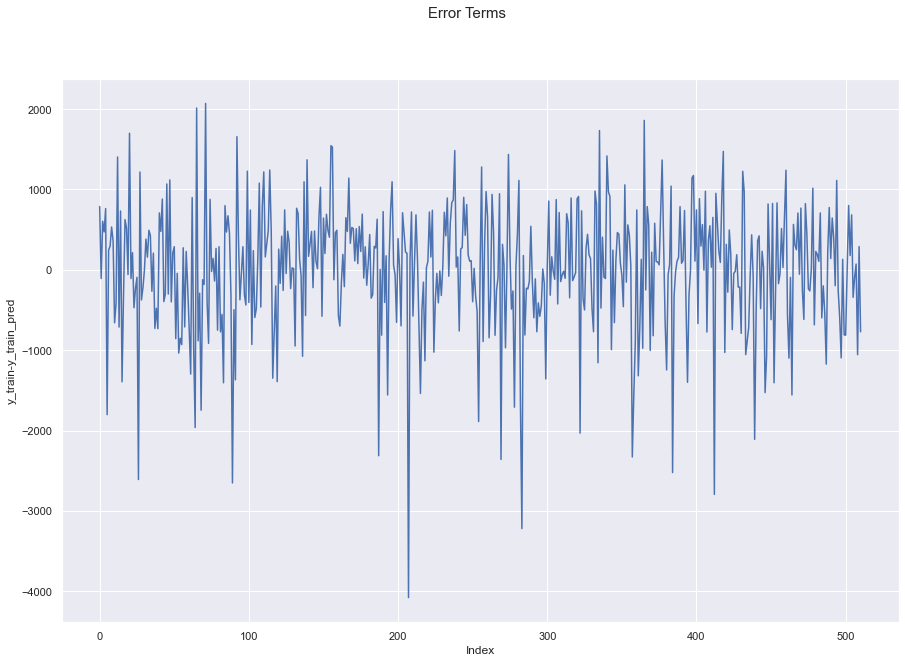

In [94]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
pylt.plot(c,y_train-y_train_pred)
pylt.suptitle('Error Terms', fontsize = 15)
pylt.xlabel('Index')
pylt.ylabel('y_train-y_train_pred')
pylt.show()

In [ ]:
# Error terms are indepedent of one another

In [95]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.832179784650283

In [ ]:
# R-square same as obtained for or final model

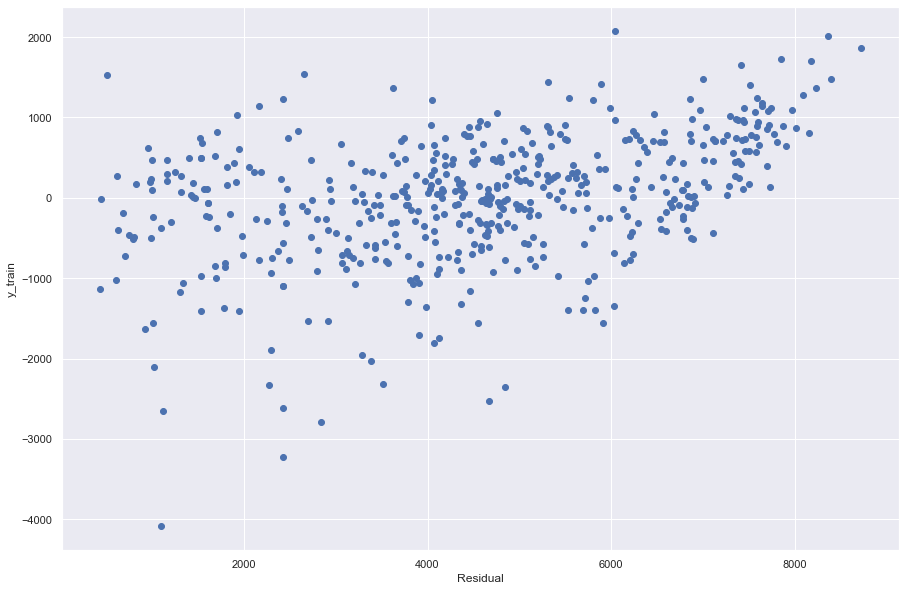

In [96]:
# scatter plot for the check
residual = (y_train - y_train_pred)
pylt.scatter(y_train,residual)
pylt.ylabel("y_train")
pylt.xlabel("Residual")
pylt.show()

In [97]:
# Predict values for test data set
num_vars = ['temp','atemp','hum','windspeed']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [98]:
cols=['yr', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
y_test_pred = lr.predict(X_test[cols])

In [99]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

-1703.7409202274016

Text(0, 0.5, 'y_test_pred')

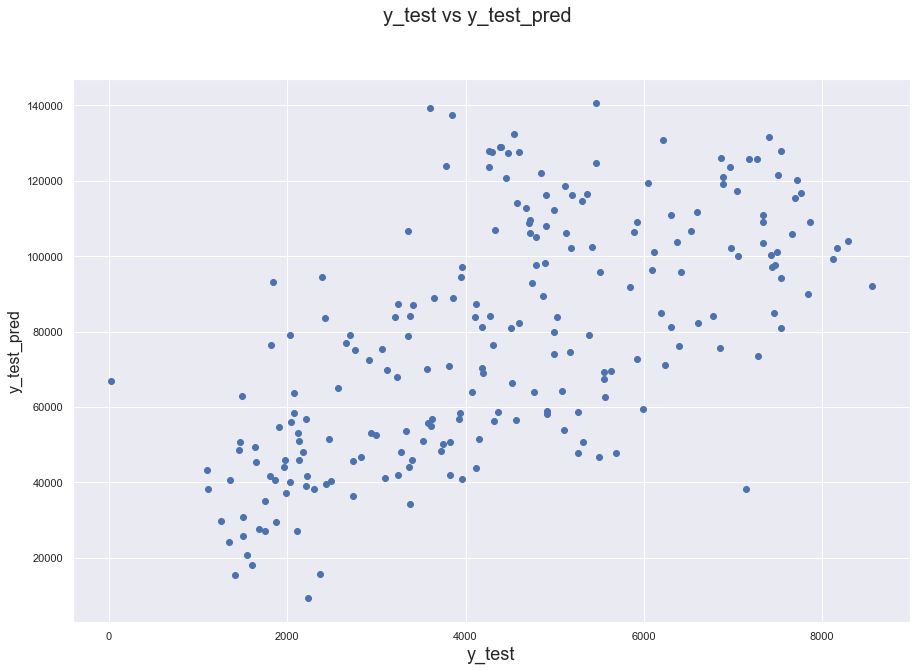

In [100]:
# Plotting y_test and y_test_pred to understand the spread
fig = pylt.figure()
pylt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
pylt.xlabel('y_test', fontsize = 18)                          
pylt.ylabel('y_test_pred', fontsize = 16)

In [ ]:
# The above plot shows that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.